In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("AirQualityUCI.csv", sep=';',na_values=-200,decimal=',')
print(df)
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

print("----------------------------------------------------------------------------------------------")
print(df)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

1. Найдите количество наблюдений для каждого диапазона значений целевой переменной
"CO(GT)" (уровень концентрации оксида углерода). Разбейте значения CO(GT) на несколько
интервалов (например, с помощью pd.cut или pd.qcut) и примените метод plot к полученным
данным, чтобы построить столбчатую диаграмму, показывающую распределение концентраций
CO.


0       (1.8, 2.9]
1       (1.8, 2.9]
2       (1.8, 2.9]
3       (1.8, 2.9]
4       (1.1, 1.8]
           ...    
9466           NaN
9467           NaN
9468           NaN
9469           NaN
9470           NaN
Name: CO(GT), Length: 9471, dtype: category
Categories (4, interval[float64, right]): [(0.099, 1.1] < (1.1, 1.8] < (1.8, 2.9] < (2.9, 11.9]]


<Axes: xlabel='CO(GT)'>

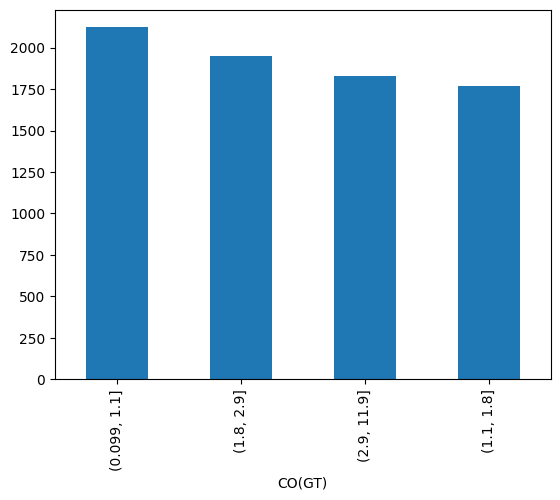

In [3]:
df_ = pd.qcut(df['CO(GT)'],4)
print(df_)
s = df_.value_counts()
s.plot(kind='bar')



2. Постройте такую же столбчатую диаграмму, как в задаче 1, но используйте логарифмический
масштаб для оси Y (количества наблюдений). Это поможет лучше визуализировать распределение,
если есть очень большие различия в частоте встречаемости разных диапазонов концентраций CO.


0       (1.8, 2.9]
1       (1.8, 2.9]
2       (1.8, 2.9]
3       (1.8, 2.9]
4       (1.1, 1.8]
           ...    
9466           NaN
9467           NaN
9468           NaN
9469           NaN
9470           NaN
Name: CO(GT), Length: 9471, dtype: category
Categories (4, interval[float64, right]): [(0.099, 1.1] < (1.1, 1.8] < (1.8, 2.9] < (2.9, 11.9]]


<Axes: xlabel='CO(GT)'>

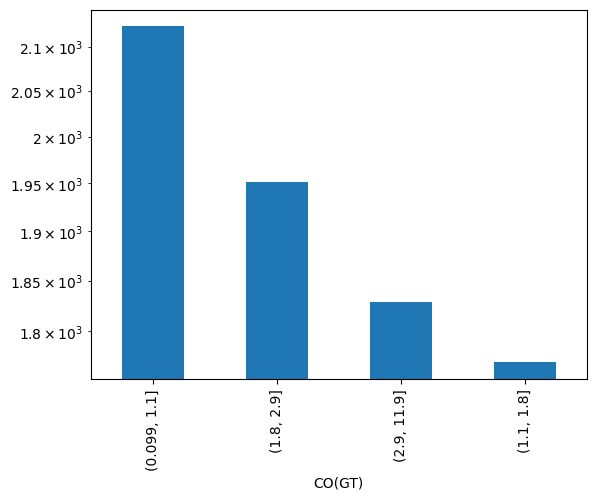

In [4]:
df_ = pd.qcut(df['CO(GT)'],4)
print(df_)
s = df_.value_counts()
s.plot(kind='bar',logy=True)

3. Постройте две гистограммы по значениям признака "T" (температура) – одну для наблюдений,
где уровень концентрации оксида углерода (CO(GT)) выше среднего, и другую – где он ниже
среднего.

Text(0, 0.5, 'Количество наблюдений')

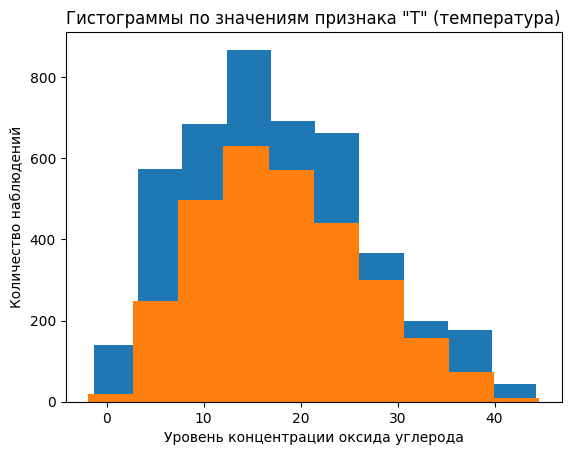

In [5]:
df_min=df.loc[(df['CO(GT)']<df['CO(GT)'].mean())]
df_max=df.loc[(df['CO(GT)']>df['CO(GT)'].mean())]
df_min['T'].plot(kind='hist')
df_max['T'].plot(kind='hist')
plt.title('Гистограммы по значениям признака "T" (температура)')
plt.xlabel('Уровень концентрации оксида углерода')
plt.ylabel('Количество наблюдений')

4. В задаче 3 подберите значение аргумента density=True в функции hist так, чтобы по вертикали
графика была расположена не частота, а плотность распределения. Число бинов должно равняться
20 для обеих гистограмм, а коэффициент alpha равным 0.5, чтобы гистограммы были
полупрозрачными и не загораживали друг друга.


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Плотность')

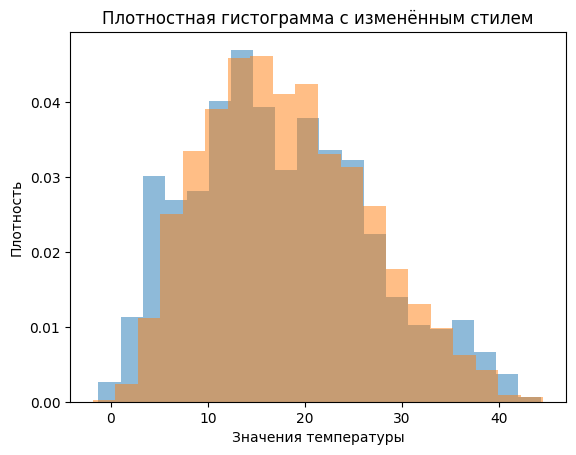

In [6]:
df_min=df.loc[(df['CO(GT)']<df['CO(GT)'].mean())]
df_max=df.loc[(df['CO(GT)']>df['CO(GT)'].mean())]
print(df_min['T'].plot(kind='hist',bins=20,density=True,alpha=0.5))
print(df_max['T'].plot(kind='hist',bins=20,density=True,alpha=0.5))
plt.title('Плотностная гистограмма с изменённым стилем')
plt.xlabel('Значения температуры')
plt.ylabel('Плотность')

Создайте легенду с двумя значениями: "CO выше среднего" и "CO ниже среднего". Гистограмма
для "CO выше среднего" должна быть красного цвета, а для "CO ниже среднего" - синего.
Название горизонтальной оси – "Температура (°C)"

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


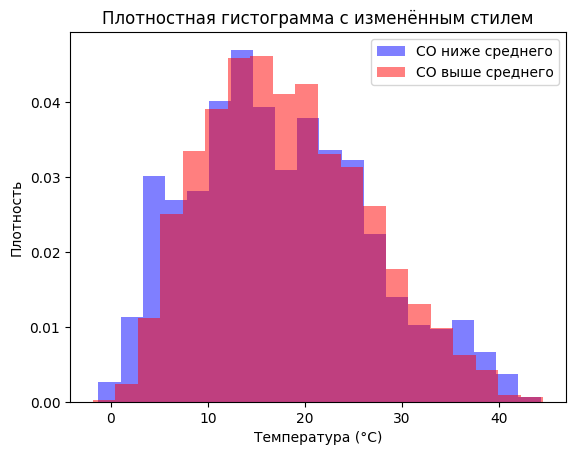

In [7]:
df_min=df.loc[(df['CO(GT)']<df['CO(GT)'].mean())]
df_max=df.loc[(df['CO(GT)']>df['CO(GT)'].mean())]
print(df_min['T'].plot(kind='hist',bins=20,density=True,alpha=0.5,color = 'blue',label="CO ниже среднего"))
print(df_max['T'].plot(kind='hist',bins=20,density=True,alpha=0.5,color = 'red',label="CO выше среднего"))
plt.title('Плотностная гистограмма с изменённым стилем')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность')
plt.legend(loc='upper right')

6. Аналогично изобразите гистограмму распределения уровня концентрации бензола (C6H6(GT))
относительно времени суток (можно выделить, например, утренние, дневные, вечерние и ночные
часы на основе признака "Время").

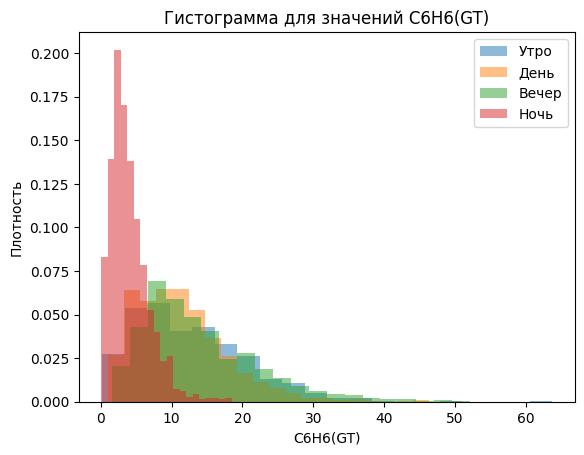

In [8]:
df['Time_format'] = pd.to_datetime(df['Time'], format='%H.%M.%S')
bins = [0,6,12,17,22]
labels = ['Ночь', 'Утро','День','Вечер']
df['Time_of_day'] = pd.cut(df['Time_format'].dt.hour, bins=bins, labels=labels)
morning=df.loc[(df['Time_of_day'] == 'Утро')]
day=df.loc[(df['Time_of_day'] == 'День')]
evening=df.loc[(df['Time_of_day'] == 'Вечер')]
night=df.loc[(df['Time_of_day'] == 'Ночь')]
morning['C6H6(GT)'].plot(kind='hist', bins=20, density=True, alpha=0.5, label="Утро")
day['C6H6(GT)'].plot(kind='hist', bins=20, density=True, alpha=0.5, label="День")
evening['C6H6(GT)'].plot(kind='hist', bins=20, density=True, alpha=0.5, label="Вечер")
night['C6H6(GT)'].plot(kind='hist', bins=20, density=True, alpha=0.5, label="Ночь")
plt.title('Гистограмма для значений C6H6(GT)')
plt.xlabel('C6H6(GT)')
plt.ylabel('Плотность')
plt.legend(loc='upper right')
plt.show()

7. Постройте гистограммы или boxplots для CO(GT) , разбив данные по времени суток (утром,
днем, вечером, ночью).

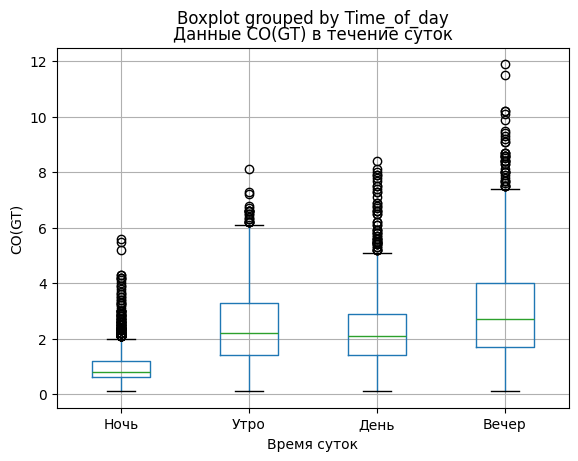

In [9]:
df['Time_format'] = pd.to_datetime(df['Time'], format='%H.%M.%S')
bins = [0,6,12,17,22]
labels = ['Ночь', 'Утро','День','Вечер']
df['Time_of_day'] = pd.cut(df['Time_format'].dt.hour, bins=bins, labels=labels)
df.boxplot(by ='Time_of_day', column =['CO(GT)'])
plt.title('Данные CO(GT) в течение суток')
plt.xlabel('Время суток')
plt.ylabel('CO(GT)')
plt.show()



8. Постройте несколько гистограмм или диаграмм рассеяния, показывающих зависимость
концентраций разных загрязняющих веществ (например, CO(GT), C6H6(GT), NOx(GT)) от
температуры (T). Это поможет оценить, как температура влияет на различные типы загрязнения.

<Axes: xlabel='T', ylabel='NOx(GT)'>

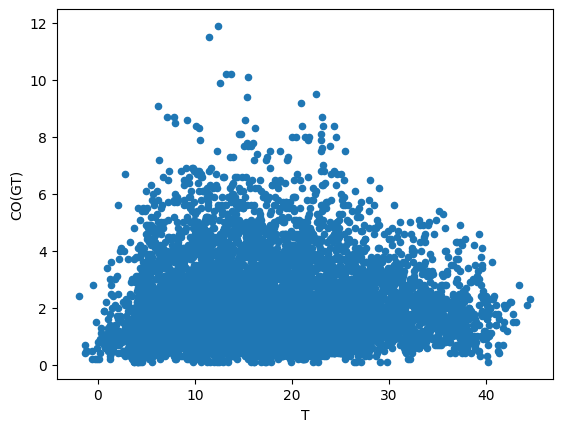

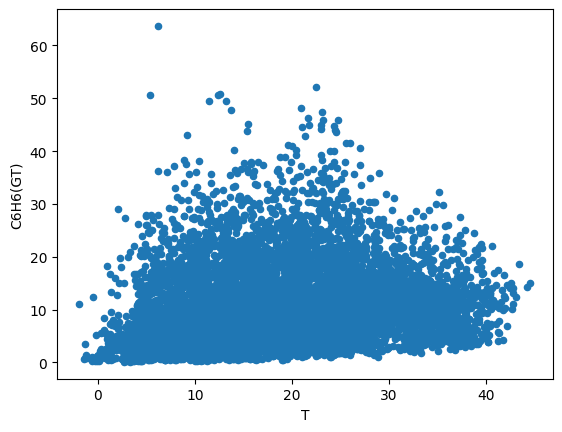

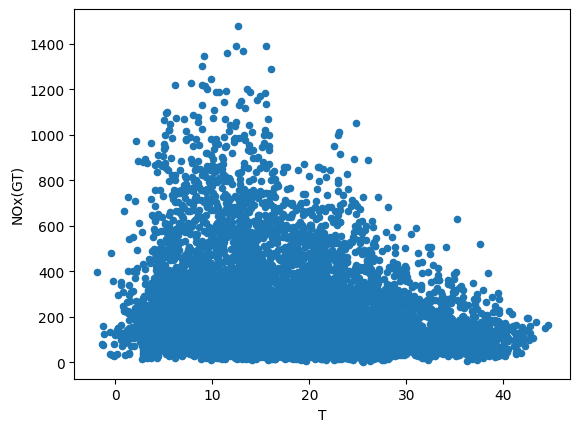

In [10]:

df_=df[["T","CO(GT)","C6H6(GT)","NOx(GT)"]].copy()
df_.plot(x="T", y="CO(GT)", kind='scatter')
df_.plot(x="T", y="C6H6(GT)", kind='scatter')
df_.plot(x="T", y="NOx(GT)", kind='scatter')

9*. Постройте график с областями (area plot), показывающий изменение во времени нескольких
показателей, например, концентрации разных веществ. Это позволит наглядно увидеть вклад
каждого вещества в общий уровень загрязнения.

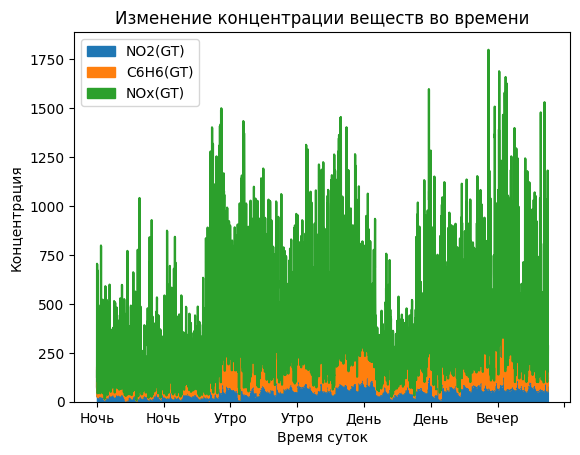

,Time_of_day,NO2(GT),C6H6(GT),NOx(GT)
1687,Ночь,73.0,5.8,48.0
6943,Ночь,164.0,14.2,527.0
4495,Ночь,51.0,3.9,110.0
2076,Ночь,91.0,7.9,131.0
2075,Ночь,71.0,4.9,57.0
...,...,...,...,...
7537,Вечер,216.0,26.0,875.0
7536,Вечер,215.0,27.7,939.0
3288,Вечер,78.0,4.0,72.0
3290,Вечер,110.0,6.6,103.0


In [11]:

df['Time_format'] = pd.to_datetime(df['Time'], format='%H.%M.%S')
bins = [0,6,12,17,22]
labels = ['Ночь', 'Утро','День','Вечер']
df['Time_of_day'] = pd.cut(df['Time_format'].dt.hour, bins=bins, labels=labels)

df_new = df[['Time_of_day','NO2(GT)','C6H6(GT)','NOx(GT)']]
df_new = df_new.dropna(subset=['Time_of_day','NO2(GT)','C6H6(GT)','NOx(GT)'])
df_new['Time_of_day'] = pd.Categorical(df_new['Time_of_day'], categories=['Ночь', 'Утро', 'День', 'Вечер'], ordered=True)
df_new = df_new.sort_values('Time_of_day')

df_new.plot.area(x='Time_of_day',y=['NO2(GT)','C6H6(GT)','NOx(GT)'], label=['NO2(GT)','C6H6(GT)','NOx(GT)'])
plt.title('Изменение концентрации веществ во времени')
plt.xlabel('Время суток')
plt.ylabel('Концентрация')
plt.legend(loc='upper left')
plt.show()
df_new
